## Exploratory Data Analysis and Data Cleaning

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data_folder = "..\\data\\raw"
os.listdir(data_folder)

['Testing.csv', 'Training.csv']

In [32]:
#load the data

training_data = pd.read_csv(os.path.join(data_folder, "Training.csv"), index_col=False)
testing_data = pd.read_csv(os.path.join(data_folder, "Testing.csv"), index_col=False)

training_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
print(training_data.info())
training_data.dtypes

<class 'pandas.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), str(1)
memory usage: 5.0 MB
None


itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
prognosis                 str
Length: 133, dtype: object

In [7]:
#check for duplicates
training_data.duplicated().sum()

np.int64(4616)

In [8]:
print(f'Percentage of duplicates: {training_data.duplicated().sum() / len(training_data):.2%}')

Percentage of duplicates: 93.82%


In [46]:
#change data types to categorical for all columns except the target variable
training_data.columns[:-1]
for col in training_data.columns[:-1]:
    training_data[col] = training_data[col].astype('category')

training_data.dtypes

itching                 category
skin_rash               category
nodal_skin_eruptions    category
continuous_sneezing     category
shivering               category
                          ...   
inflammatory_nails      category
blister                 category
red_sore_around_nose    category
yellow_crust_ooze       category
prognosis                    str
Length: 133, dtype: object

C:\Users\deeqa\AppData\Local\Temp\ipykernel_21364\1465644195.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  training_data['num_symptoms'] = training_data.iloc[:, :-1].sum(axis=1)


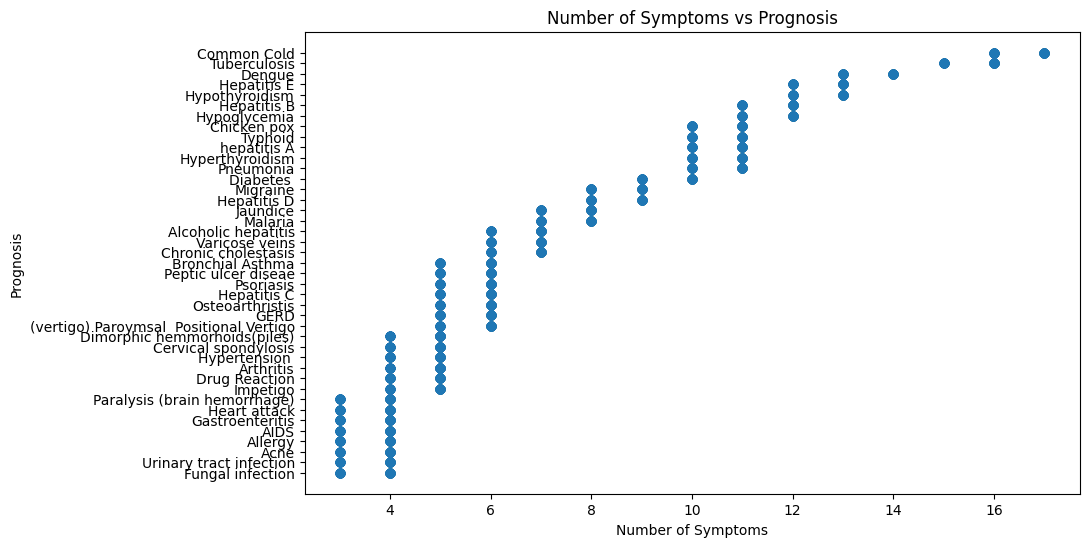

In [33]:
#change the datatype of the features to int
for col in training_data.columns[1:132]:
    training_data[col] = training_data[col].astype(int)

#sort the data by the number of symptoms (the sum of the features) and plot the distribution of the target variable for each number of symptoms

#for each observation, count the number of features that have a value of 1 and add it as a new feature
training_data['num_symptoms'] = training_data.iloc[:, :-1].sum(axis=1)
training_data = training_data.sort_values(by='num_symptoms')

#plot the number of symptoms for each observation against the target variable
plt.figure(figsize=(10, 6))
plt.scatter(training_data['num_symptoms'], training_data['prognosis'])
plt.xlabel('Number of Symptoms')
plt.ylabel('Prognosis')
plt.title('Number of Symptoms vs Prognosis')
plt.show()

prognosis
(vertigo) Paroymsal  Positional Vertigo    7
AIDS                                       5
Acne                                       5
Alcoholic hepatitis                        8
Allergy                                    5
dtype: int64


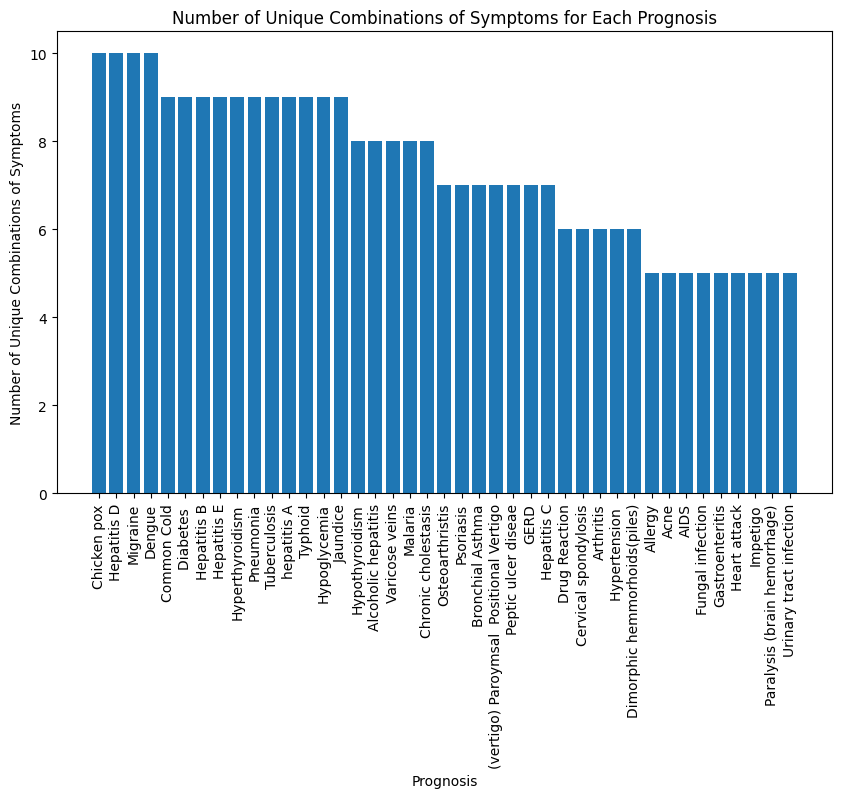

In [37]:
#are there unique combinations of symptoms that lead to a particular prognosis? group the data by the target variable and count the number of unique combinations of symptoms for each prognosis
unique_combinations = training_data.groupby('prognosis').apply(lambda x: x.iloc[:, :-2].drop_duplicates().shape[0])
print(unique_combinations.head())

#sort the unique combinations by the number of unique combinations of symptoms for each prognosis
unique_combinations = unique_combinations.sort_values(ascending=False)
#plot the number of unique combinations of symptoms for each prognosis
plt.figure(figsize=(10, 6))
plt.bar(unique_combinations.index, unique_combinations.values)
plt.xlabel('Prognosis')
plt.ylabel('Number of Unique Combinations of Symptoms')
plt.title('Number of Unique Combinations of Symptoms for Each Prognosis')
plt.xticks(rotation=90)
plt.show()



In [38]:
#are there any prognoses that share the same combinations of symptoms? group the data by the target variable and count the number of unique combinations of symptoms for each prognosis
symptom_combinations = training_data.groupby('prognosis').apply(lambda x: x.iloc[:, :-2].drop_duplicates())
#count the number of unique combinations of symptoms for each prognosis
symptom_combinations_count = symptom_combinations.apply(lambda x: x.shape[0])
print(symptom_combinations_count.head())


itching                 303
skin_rash               303
nodal_skin_eruptions    303
continuous_sneezing     303
shivering               303
dtype: int64


prognosis
(vertigo) Paroymsal  Positional Vertigo    5.65
AIDS                                       3.65
Acne                                       3.65
Alcoholic hepatitis                        6.65
Allergy                                    3.60
Name: num_symptoms, dtype: float64


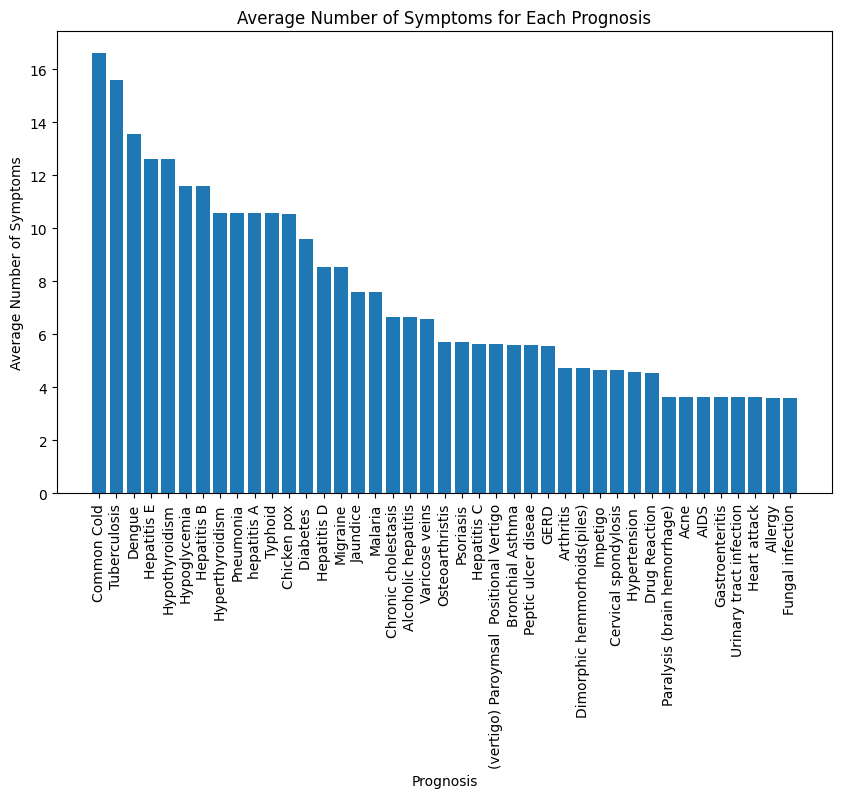

In [41]:
#what is the average number of symptoms for each observation? group the data by the target variable and calculate the average number of symptoms for each prognosis
average_num_symptoms = training_data.groupby('prognosis')['num_symptoms'].mean()
print(average_num_symptoms.head())

#sort the average number of symptoms by the average number of symptoms for each prognosis
average_num_symptoms = average_num_symptoms.sort_values(ascending=False)
#plot the average number of symptoms for each prognosis
plt.figure(figsize=(10, 6))
plt.bar(average_num_symptoms.index, average_num_symptoms.values)
plt.xlabel('Prognosis')
plt.ylabel('Average Number of Symptoms')
plt.title('Average Number of Symptoms for Each Prognosis')
plt.xticks(rotation=90)
plt.show()



0    4.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: num_symptoms, dtype: float64


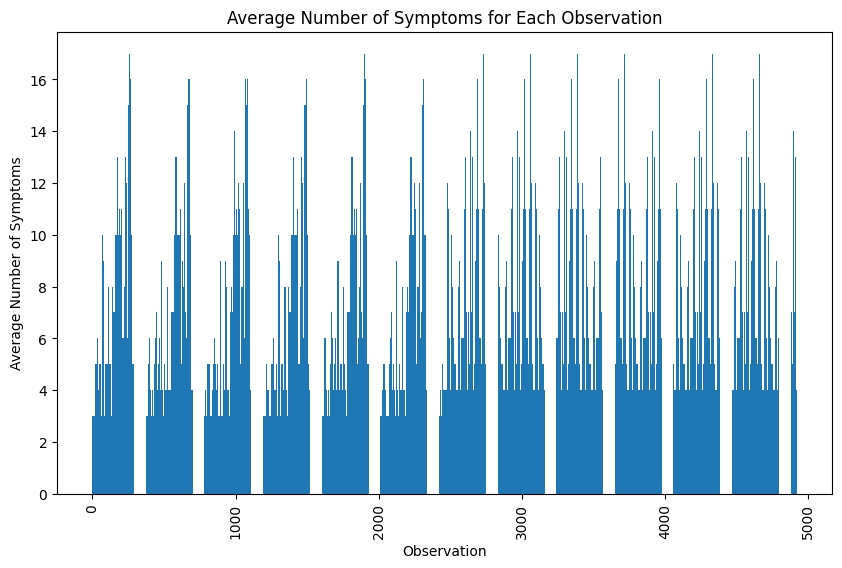

In [44]:
#average number of symptoms for each observation? group the data by observation and calculate the average number of symptoms for each observation
average_num_symptoms_observation = training_data.groupby(training_data.index)['num_symptoms'].mean()
print(average_num_symptoms_observation.head())

#sort the average number of symptoms by the average number of symptoms for each observation
average_num_symptoms_observation = average_num_symptoms_observation.sort_values(ascending=False)

#plot the average number of symptoms for each observation
plt.figure(figsize=(10, 6))
plt.bar(average_num_symptoms_observation.index, average_num_symptoms_observation.values)
plt.xlabel('Observation')
plt.ylabel('Average Number of Symptoms')
plt.title('Average Number of Symptoms for Each Observation')
plt.xticks(rotation=90)
plt.show()
